In [4]:
import gym
import numpy as np

class NonStationaryInteractionAgentEnv(gym.Env):
    def __init__(self):
        super(NonStationaryInteractionAgentEnv, self).__init__()
        self.action_space = gym.spaces.Discrete(3)
        self.observation_space = gym.spaces.Box(low=0, high=10, shape=(1,), dtype=np.float32)
        self.state = None
        self.timestep = 0
        self.value_function = np.zeros(10)  # Value function for states 0 to 9
        self.learning_rate = 0.1  # Initial learning rate

    def get_reward(self, state):
        # Dynamic reward function that changes based on state and timestep
        discrete_state = int(np.clip(state[0], 0, 9))
        # Example: reward decreases over time and depends on state
        reward = (10 - discrete_state) * np.exp(-self.timestep / 20)
        return reward

    def reset(self):
        self.state = np.random.uniform(low=0, high=10, size=(1,))
        self.timestep = 0
        return self.state

    def step(self, action):
        self.timestep += 1
# Update state (simple random walk)
        self.state = np.random.uniform(low=0, high=10, size=(1,))
        reward = self.get_reward(self.state)

        # Incrementally update the value function
        discrete_state = int(np.clip(self.state[0], 0, 9))
        self.value_function[discrete_state] += self.learning_rate * (reward - self.value_function[discrete_state])

        done = self.timestep >= 10  # End after 10 timesteps
        return self.state, reward, done, {}

    def render(self):
        current_reward = self.get_reward(self.state)
        print(f"State: {self.state[0]:.2f}, Reward: {current_reward:.2f}, Timestep: {self.timestep}, Value: {self.value_function[int(np.clip(self.state[0], 0, 9))]:.2f}")

# Create environment
env = NonStationaryInteractionAgentEnv()

# Run the agent
total_rewards = []
reward_history = []

state = env.reset()
done = False

while not done:
    action = env.action_space.sample()  # Random action for illustration
    next_state, reward, done, info = env.step(action)

    total_rewards.append(reward)
    reward_history.append(reward)

    env.render()

# Print final value function
print("Final Value Function:", env.value_function)


State: 5.16, Reward: 4.76, Timestep: 1, Value: 0.48
State: 0.25, Reward: 9.05, Timestep: 2, Value: 0.90
State: 9.32, Reward: 0.86, Timestep: 3, Value: 0.09
State: 7.04, Reward: 2.46, Timestep: 4, Value: 0.25
State: 2.16, Reward: 6.23, Timestep: 5, Value: 0.62
State: 2.94, Reward: 5.93, Timestep: 6, Value: 1.15
State: 4.37, Reward: 4.23, Timestep: 7, Value: 0.42
State: 5.66, Reward: 3.35, Timestep: 8, Value: 0.76
State: 9.84, Reward: 0.64, Timestep: 9, Value: 0.14
State: 8.88, Reward: 1.21, Timestep: 10, Value: 0.12
Final Value Function: [0.90483742 0.         1.15339114 0.         0.42281285 0.76321326
 0.         0.24561923 0.12130613 0.14122653]


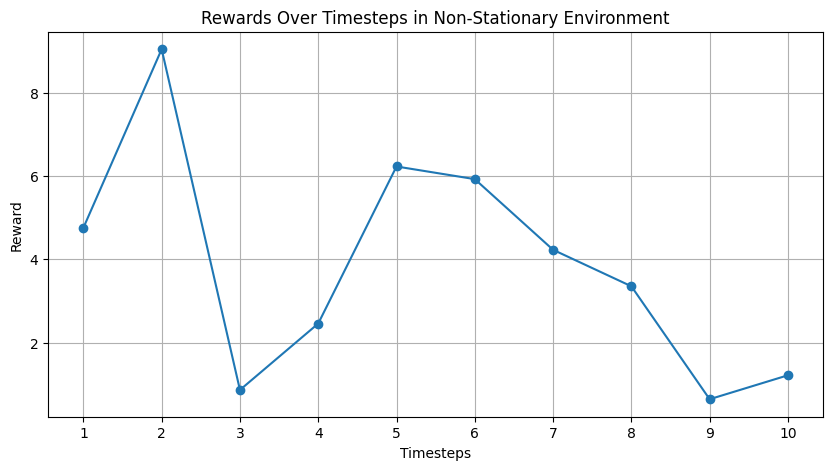

In [5]:
import matplotlib.pyplot as plt

# Plotting the rewards over time
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(reward_history) + 1), reward_history, marker='o')
plt.title('Rewards Over Timesteps in Non-Stationary Environment')
plt.xlabel('Timesteps')
plt.ylabel('Reward')
plt.xticks(range(1, len(reward_history) + 1))
plt.grid()
plt.show()
